In [2]:
# importing necessary libraries for analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm 

# Use ggplot style for visulizations
plt.style.use('ggplot')

In [ ]:
# Import HIV data
data = pd.read_excel('HIV.xlsx', index=False)
data = data[['sample_id', 'data_1', 'Cutoff ', 'data_2', 'Cutoff .1']]
## set column names
data.columns = [['id', 'evo_data', 'evo_resp', 'rmp_data', 'rmp_resp']]

data.columns

In [41]:
# Import Syphillis data
syph = pd.read_excel('Syphillis.xlsx', index=False)
syph.columns = [['id', 'evo_data', 'evo_resp', 'rmp_data', 'rmp_resp']]
# syph = syph.drop(syph.index[:1])
syph.head(10)

,id,evo_data,evo_resp,rmp_data,rmp_resp
0,Sample ID 1,Measurement data,Cutoff results,Measurement data,Cutoff results
1,TRP NC,0.06,Negative,0.02,Negative
2,TRP NC,0.06,Negative,0.02,Negative
3,TRP NC,0.06,Negative,0.01,Negative
4,TRP PC,3.06,POSITIVE,2.53,POSITIVE
5,TRP PC,2.78,POSITIVE,2.34,POSITIVE
6,TRP QC,2.79,POSITIVE,2.05,POSITIVE
7,17V0160300,0.06,Negative,0.02,Negative
8,17V0161263,0.18,Negative,0.02,Negative
9,17V0161328,0.06,Negative,0.02,Negative


In [32]:
syph.describe()

,id,evo_data,evo_resp,rmp_data,rmp_resp
count,422,422.00,421,410.00,410
unique,379,44.00,4,35.00,4
top,TRP NC,0.07,Negative,0.02,Negative
freq,21,198.00,385,244.00,379


In [42]:
syph = syph.drop_duplicates(subset = syph['id'])
syph.describe()

,id,evo_data,evo_resp,rmp_data,rmp_resp
count,380,380.00,379,380.00,380
unique,380,25.00,5,27.00,5
top,17V0161909,0.07,Negative,0.02,Negative
freq,1,187.00,362,232.00,362


In [62]:
syph = syph.drop(syph.index[:3])
syph.describe()

,evo_data,rmp_data
count,372.000000,372.000000
mean,0.127984,0.063293
std,0.344045,0.278786
min,-0.070000,-0.010000
25%,0.070000,0.010000
50%,0.070000,0.020000
75%,0.080000,0.020000
max,3.630000,2.437000


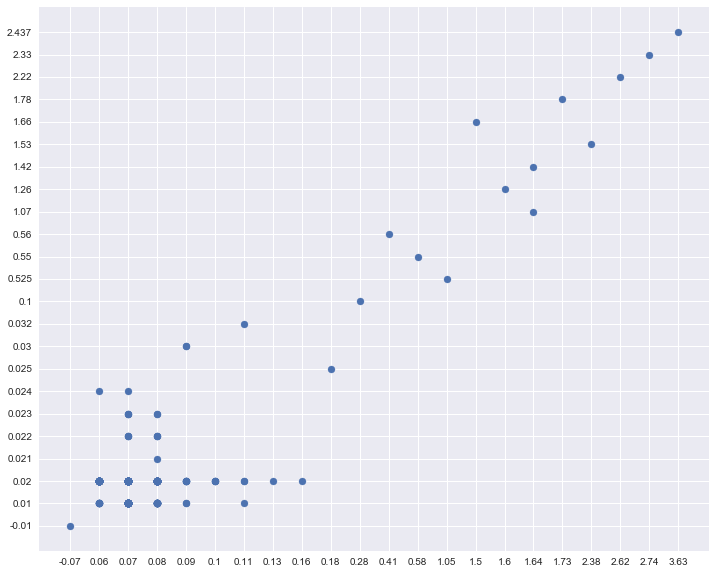

In [63]:
plt.scatter(syph.evo_data, syph.rmp_data)
plt.show()

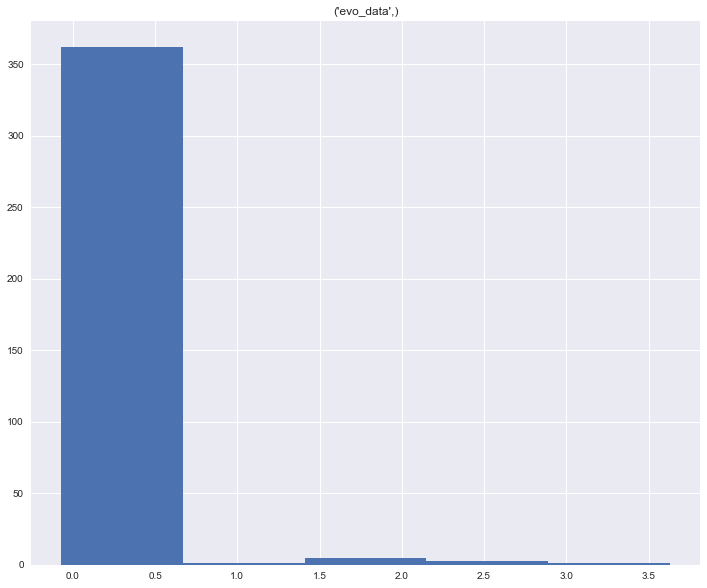

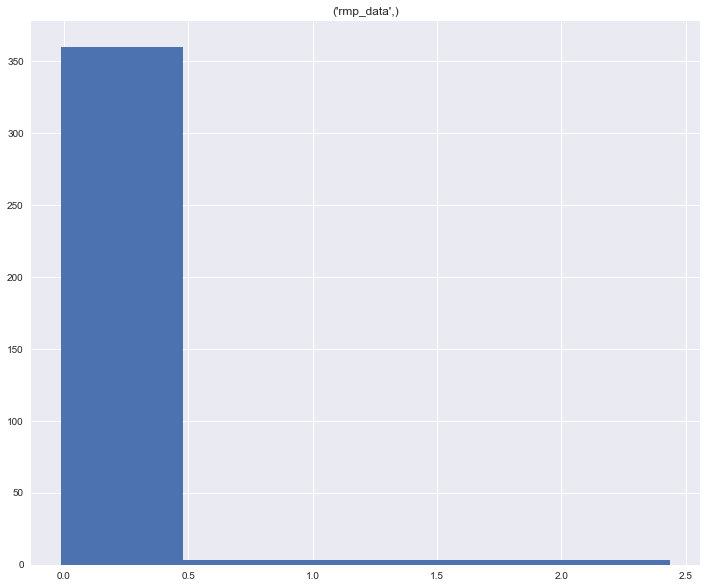

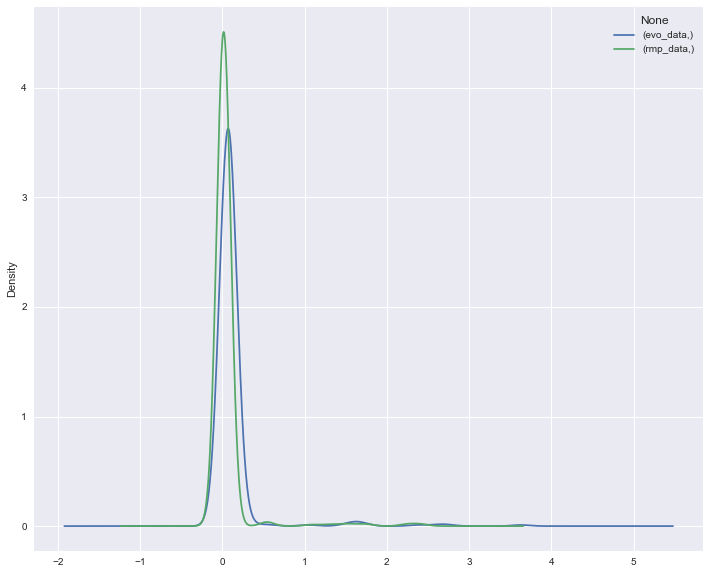

In [67]:
syph['evo_data'].hist(bins=5)
plt.show()
syph['rmp_data'].hist(bins=5)
syph.plot.kde()
#plt.vlines(2.83, 0, 1, colors='k', linestyles='solid', label='')
plt.show()

In [68]:
syph.replace('', np.nan, inplace=True)
syph.dropna(inplace=True)

In [69]:
import numpy as np
syph.fillna(syph.mean(), inplace=True)

x = np.array(syph.evo_data)
y = np.array(syph.rmp_data)


In [70]:
from scipy.stats import pearsonr
corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.981


In [71]:
# calculate the Cohen's d between two samples
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt

# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s


d = cohend(x,y)
print('Cohens d: %.3f' % d)

Cohens d: 0.207


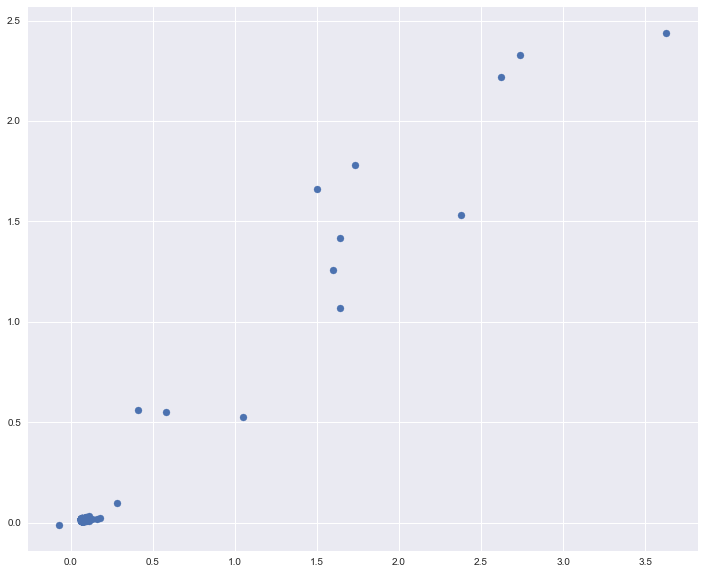

In [72]:
plt.scatter(x,y)
plt.show()

In [73]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

Cohen_d(x,y)

0.20687897729467372

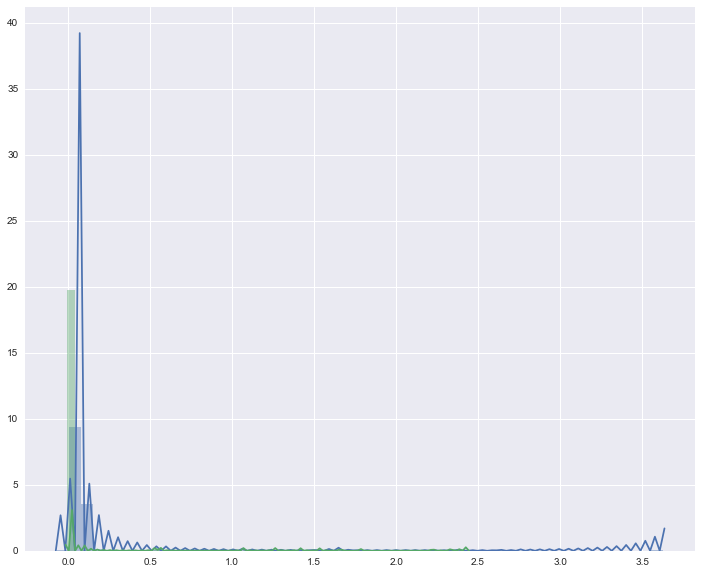

In [59]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(x) # Blue distribution
sns.distplot(y) # Green distribution

In [60]:
from scipy import stats
stats.ttest_ind(x,y)

Ttest_indResult(statistic=array([2.84544703]), pvalue=array([0.00455618]))

In [61]:
stats.ttest_rel(x,y)

Ttest_relResult(statistic=array([14.1895935]), pvalue=array([7.27008113e-37]))